# Цели и задачи проекта

Используются данные успеваемости по математике студентов двух школ. Имеется информация о различных аспектах жизни студента, на основании которой предлагается прогнозировать его оценку.

## Предполагается развитие следующих навыков и умений

- предобработка данных
- определение значимости переменных
- выявлене и чистка выбросов, заполнение пропущенных значений
- готовить данные для обучения модели

# Импорты и определения функций

In [1]:
from copy import deepcopy
from itertools import combinations

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

from sklearn.impute import KNNImputer
import numpy as np

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 50)

sns.set()


def get_boxplot(column, df, y="score"):
    df_copy = deepcopy(df.loc[~df[y].isna()])
    df_copy[column] = df_copy[column].apply(lambda x: str(x))
    df_copy[y] = df_copy[y].apply(lambda x: None if str(x) == "nan" else x)
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.boxplot(
        x=column,
        y=y,
        data=df_copy,
        ax=ax,
    )
    ax.set_title("Boxplot for " + column)
    plt.show()


def get_stat_dif(column, alpha=0.05):
    cols = students.loc[:, column].value_counts().index.dropna()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(
            students.loc[students.loc[:, column] == comb[0], "score"].dropna(),
            students.loc[students.loc[:, column] == comb[1], "score"].dropna(),
        ).pvalue <= alpha / len(
            combinations_all
        ):  # Учли поправку Бонферони
            print("Найдены статистически значимые различия для колонки", column)
            return column
            # break


def get_boxplots(col_list: list):
    for col in col_list:
        if (
            "nan" in [str(c) for c in students[col].unique()]
            or None in students[col].unique()
        ):
            print(
                "\n[X] Has NA values!   ",
                f"[ {col} ]",
                "\n",
                students[col].replace({None: "None"}).value_counts(),
                sep="",
            )
            students[col] = students[col].apply(
                lambda x: None if str(x) == "nan" else x
            )
            get_boxplot(col, students)
        else:
            print(
                "\n[V] Looks fine       ",
                f"[ {col} ]",
                "\n",
                students[col].value_counts(),
                sep="",
            )
            get_boxplot(col, students)


def get_numeric_overview(variable_list):
    for variable in variable_list:
        print(f"\n\n\n-= {variable} =-")
        sns.displot(students[variable], discrete=True)
        plt.show()
        print(
            "Уникальные значения:",
            students[variable].sort_values().unique().tolist(),
            sep="\n",
        )
        print("Частоты:", students[variable].value_counts(), sep="\n")
        print("Пропущенных:", students.loc[students[variable].isna()].shape[0])

## Читаем и смотрим как выглядит

In [2]:
students = pd.read_csv("stud_math.csv")
students.sample(30)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
308,GP,M,19,R,GT3,T,3.0,3.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,NaN,4.0,5.0,3.0,5.0,0.0,60.0
27,GP,M,15,U,GT3,T,4.0,2.0,health,services,other,mother,1.0,1.0,0.0,NaN,no,yes,no,yes,-3.0,yes,yes,NaN,2.0,2.0,4.0,1.0,4.0,75.0
56,GP,F,15,U,GT3,A,4.0,3.0,services,services,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,2.0,1.0,0.0,75.0
342,GP,M,18,U,LE3,NaN,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,no,no,no,yes,yes,-6.0,yes,yes,NaN,4.0,3.0,3.0,NaN,11.0,75.0
250,GP,M,18,U,GT3,T,3.0,2.0,services,NaN,course,mother,2.0,1.0,1.0,no,no,no,no,yes,-3.0,NaN,yes,no,4.0,4.0,5.0,5.0,0.0,40.0
31,GP,M,15,U,GT3,T,4.0,4.0,services,NaN,reputation,mother,2.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85.0
320,GP,F,17,U,GT3,A,4.0,3.0,services,services,course,mother,1.0,2.0,NaN,no,yes,yes,no,yes,-6.0,NaN,yes,yes,5.0,2.0,2.0,5.0,23.0,65.0
339,GP,F,17,R,GT3,A,3.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,NaN,4.0,3.0,3.0,2.0,4.0,50.0
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,NaN,mother,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0


# Работаем с номинативными переменными

## Сводная информация по строковым колонкам (номинативным переменным)

In [3]:
print(
    "String columns count:",
    len(students.select_dtypes("object").columns.tolist()),
)
string_columns_overview = students.describe(include="object").T.sort_values(
    ["unique"], ascending=False
)
string_columns_overview

String columns count: 17


,count,unique,top,freq
Mjob,376,5,other,133
Fjob,359,5,other,197
reason,378,4,course,137
guardian,364,3,mother,250
famsup,356,2,yes,219
internet,361,2,yes,305
higher,375,2,yes,356
nursery,379,2,yes,300
activities,381,2,yes,195
paid,355,2,no,200


## Смотрим распределения оценок относительно категорий каждой номинативной переменной и количества уникальных значений


[X] Has NA values!   [ Mjob ]
other       133
services     98
at_home      58
teacher      55
health       32
None         19
Name: Mjob, dtype: int64


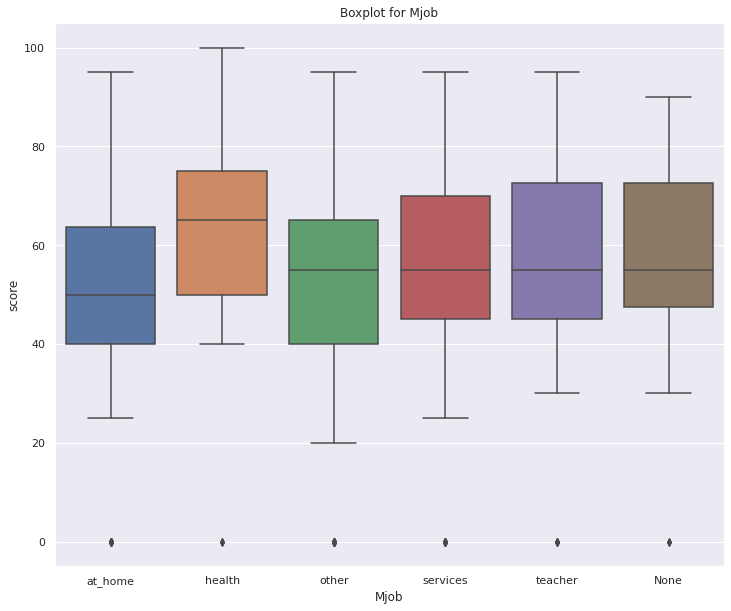


[X] Has NA values!   [ Fjob ]
other       197
services    102
None         36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64


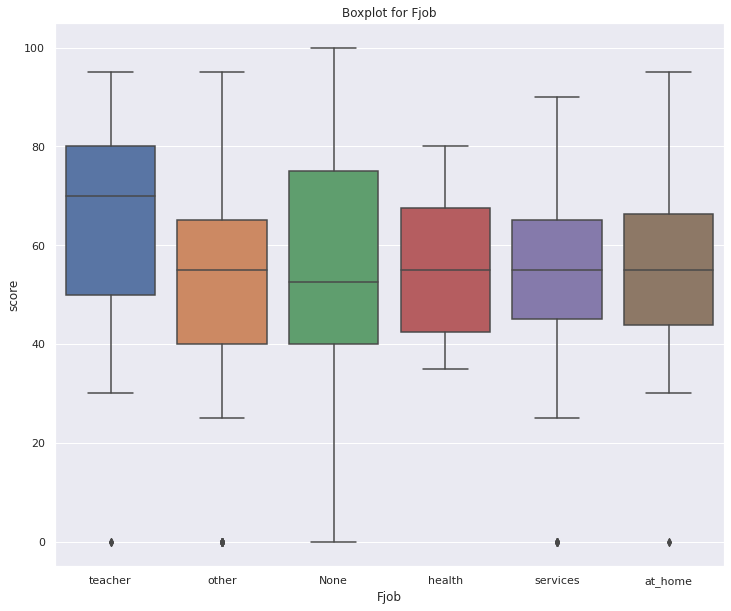


[X] Has NA values!   [ reason ]
course        137
home          104
reputation    103
other          34
None           17
Name: reason, dtype: int64


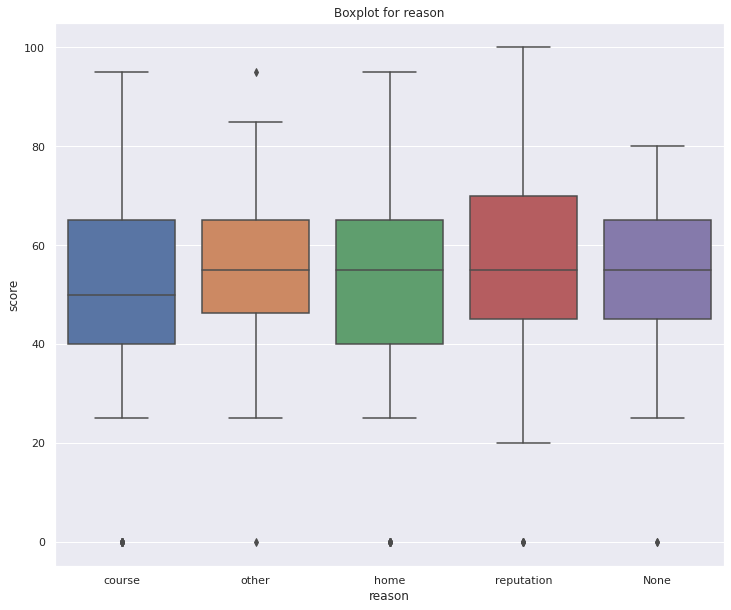


[X] Has NA values!   [ guardian ]
mother    250
father     86
None       31
other      28
Name: guardian, dtype: int64


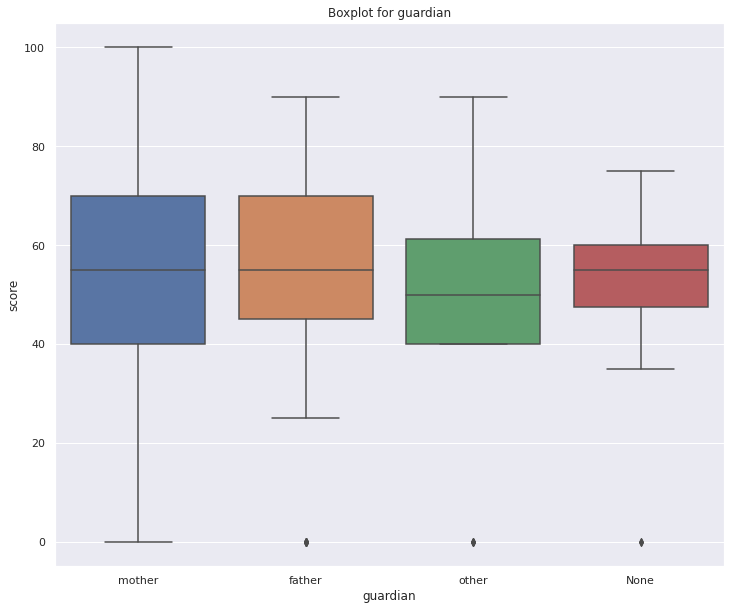


[X] Has NA values!   [ famsup ]
yes     219
no      137
None     39
Name: famsup, dtype: int64


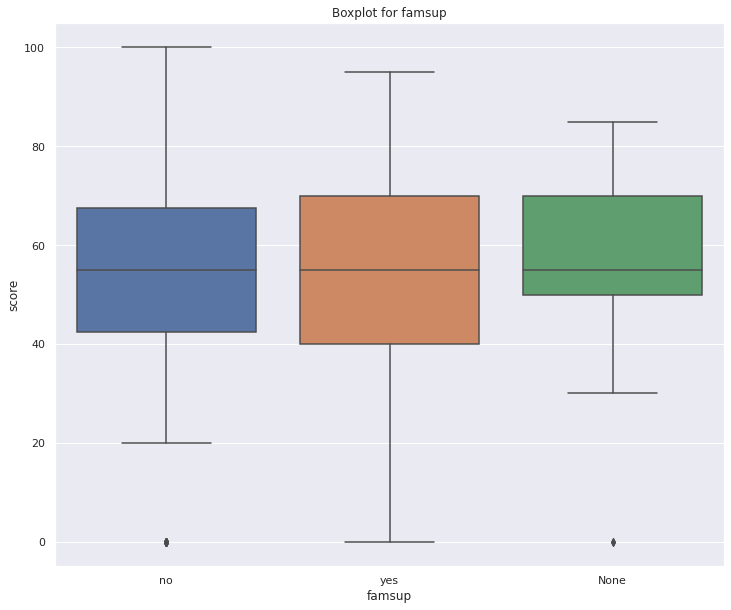


[X] Has NA values!   [ internet ]
yes     305
no       56
None     34
Name: internet, dtype: int64


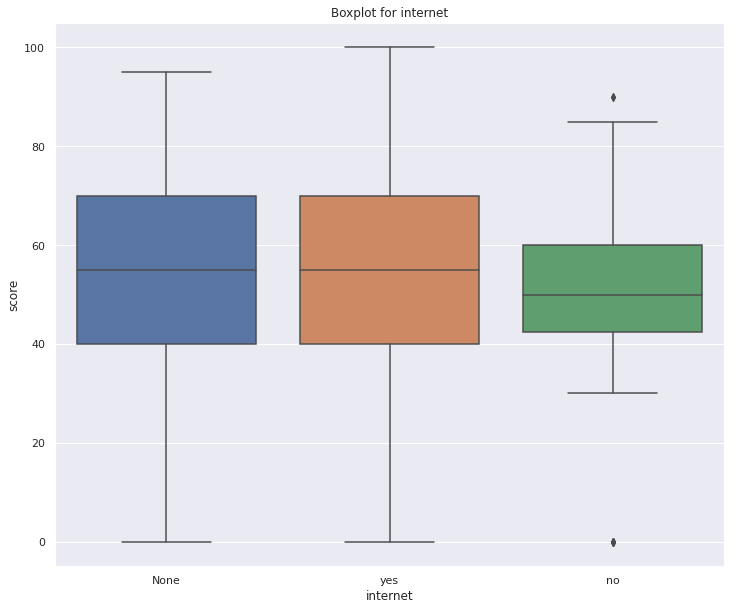


[X] Has NA values!   [ higher ]
yes     356
None     20
no       19
Name: higher, dtype: int64


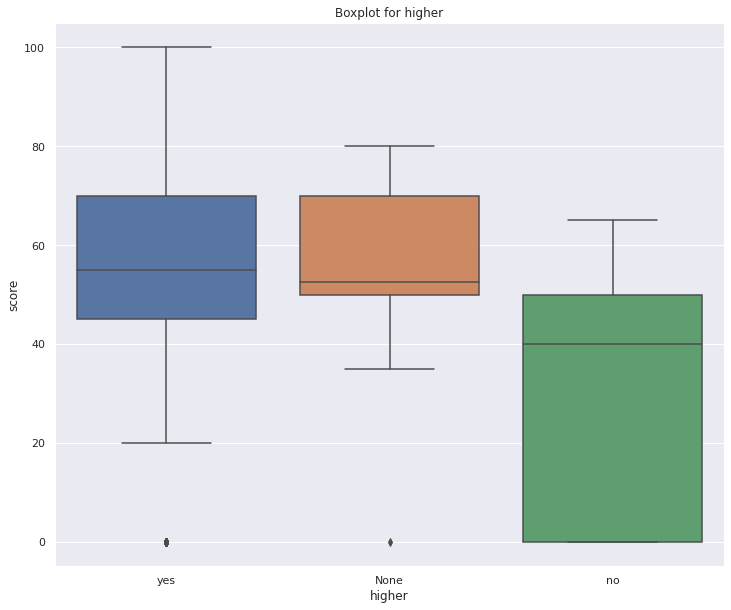


[X] Has NA values!   [ nursery ]
yes     300
no       79
None     16
Name: nursery, dtype: int64


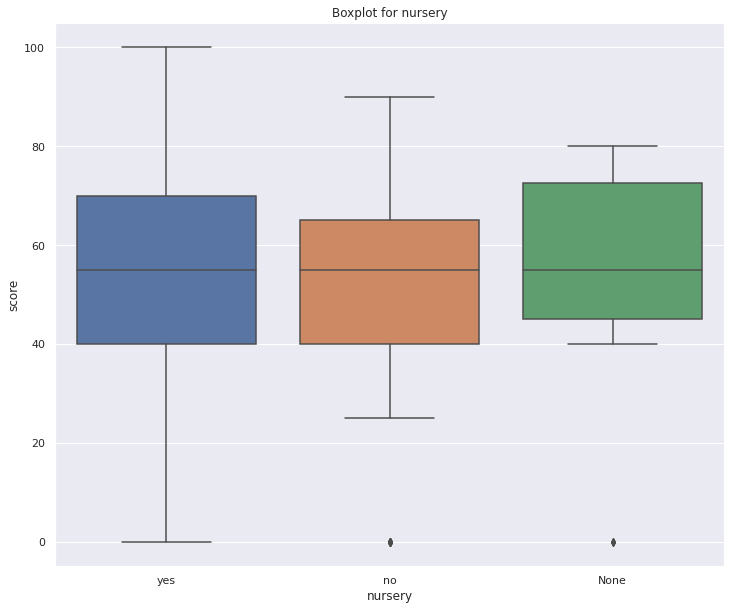


[X] Has NA values!   [ activities ]
yes     195
no      186
None     14
Name: activities, dtype: int64


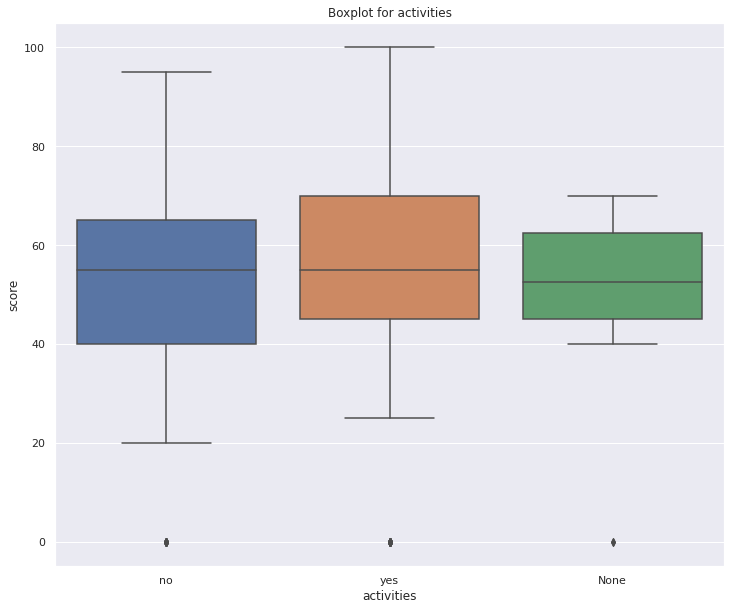


[X] Has NA values!   [ paid ]
no      200
yes     155
None     40
Name: paid, dtype: int64


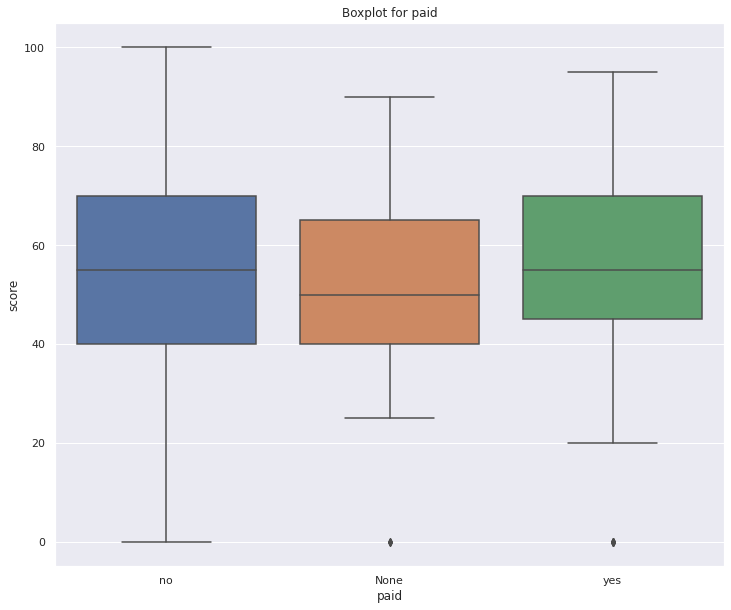


[V] Looks fine       [ school ]
GP    349
MS     46
Name: school, dtype: int64


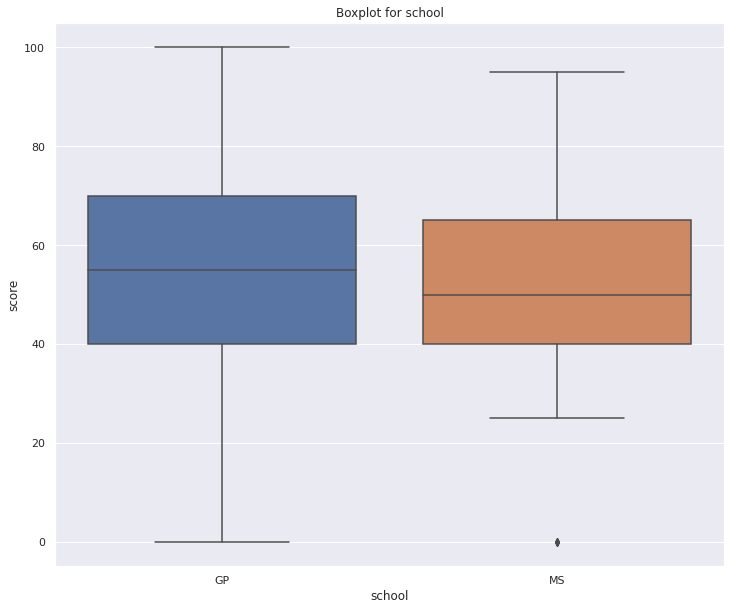


[X] Has NA values!   [ schoolsup ]
no      335
yes      51
None      9
Name: schoolsup, dtype: int64


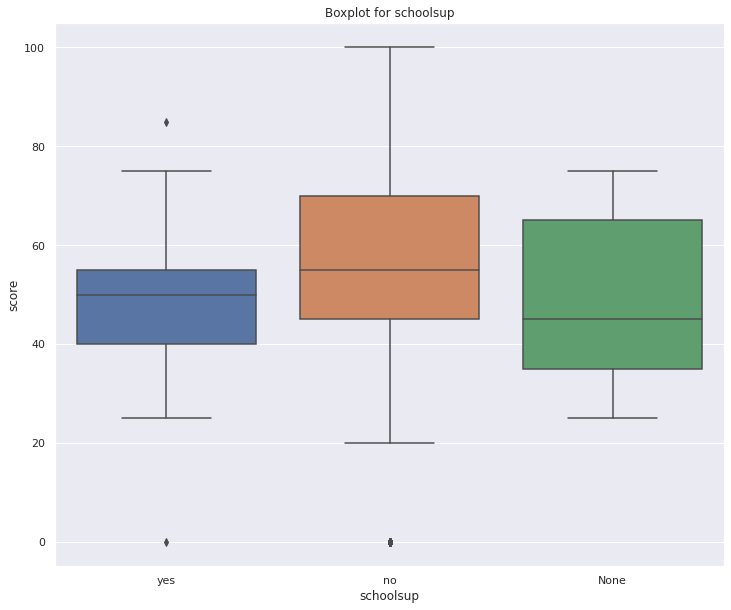


[V] Looks fine       [ sex ]
F    208
M    187
Name: sex, dtype: int64


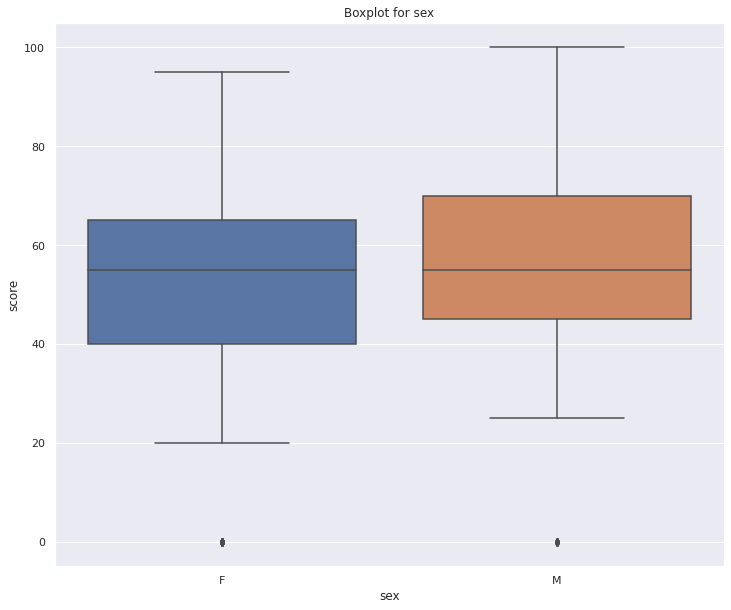


[X] Has NA values!   [ Pstatus ]
T       314
None     45
A        36
Name: Pstatus, dtype: int64


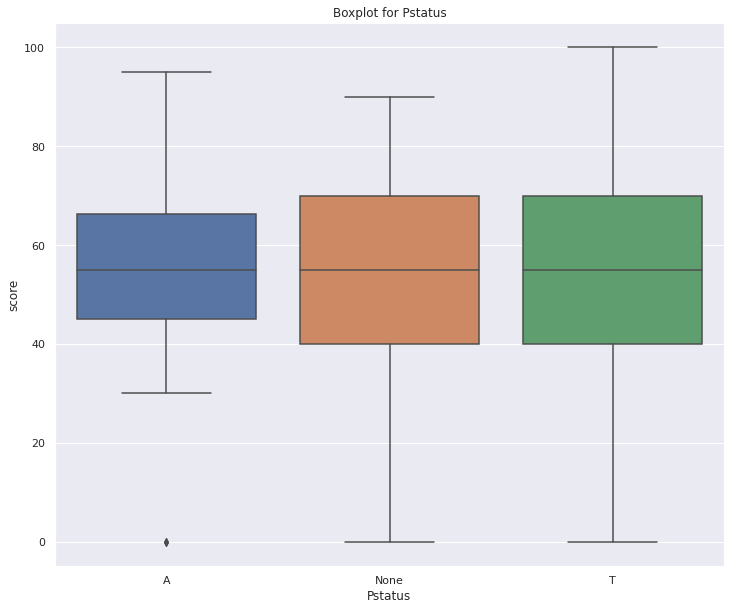


[X] Has NA values!   [ famsize ]
GT3     261
LE3     107
None     27
Name: famsize, dtype: int64


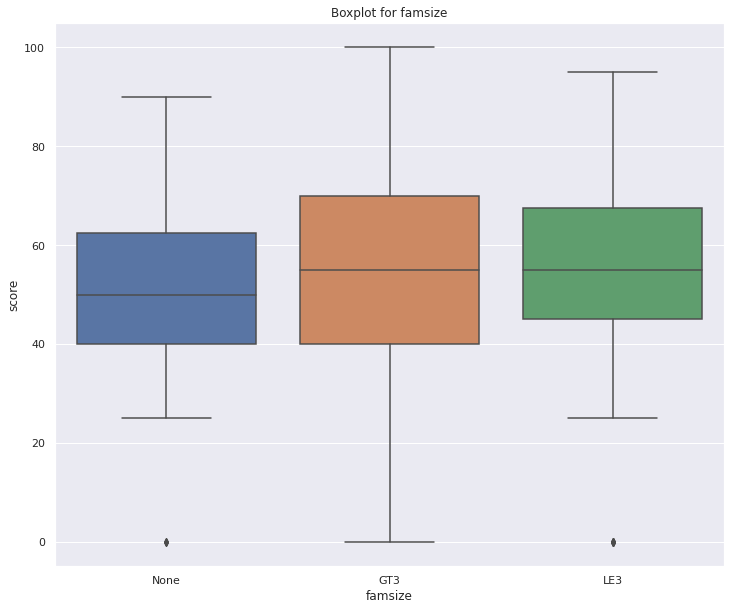


[X] Has NA values!   [ address ]
U       295
R        83
None     17
Name: address, dtype: int64


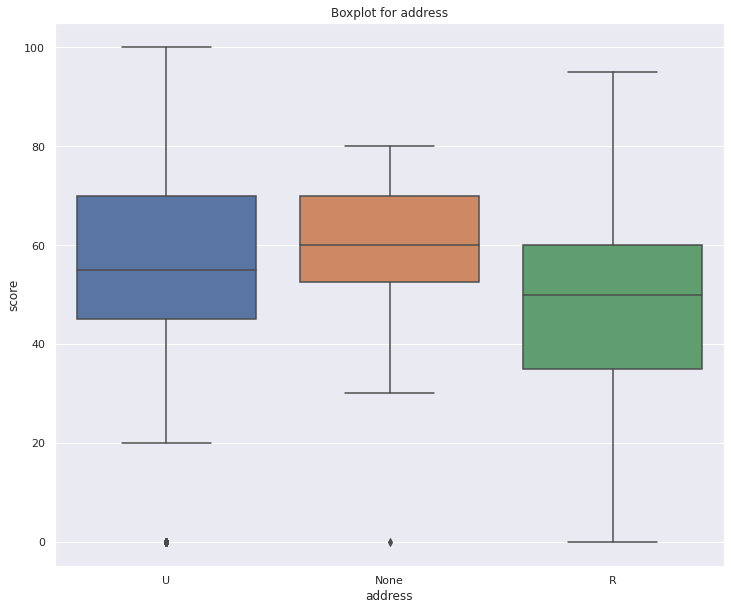


[X] Has NA values!   [ romantic ]
no      240
yes     124
None     31
Name: romantic, dtype: int64


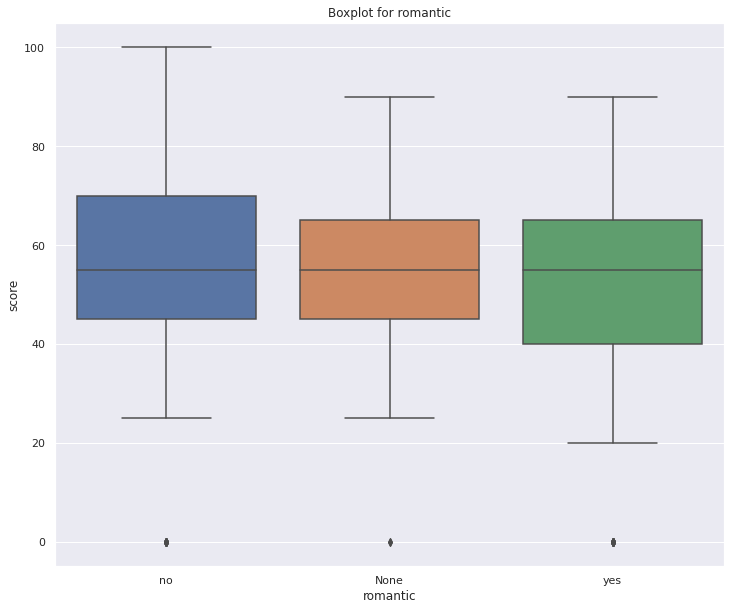

In [4]:
get_boxplots(string_columns_overview.index)

## Определим колонки со статистически значимыми различиями

In [5]:
use_nominative_cols = []
for col in string_columns_overview.index:
    use_nominative_cols += [get_stat_dif(col, 0.05)]
use_nominative_cols = [c for c in use_nominative_cols if not c is None]

Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки romantic


## Мне кажется немного странным, что в колонке Fjob не было нйдено статистичепски значимых различий

По графику я вижу, что папа-учитель, существенно влияет на оценку студента.
Так что добавлю этот параметр вручную к отобранным статистически переменным и построю графики только по отобранным параметрам.


[X] Has NA values!   [ Fjob ]
other       197
services    102
None         36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64


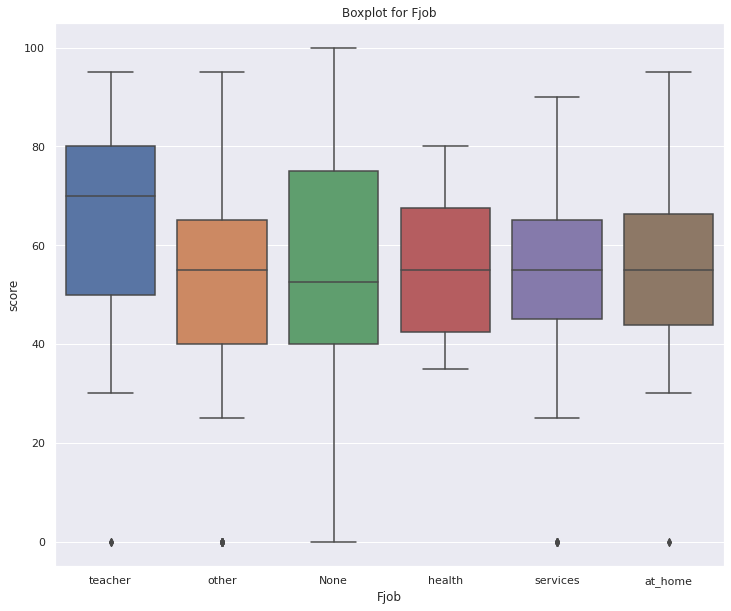


[X] Has NA values!   [ Mjob ]
other       133
services     98
at_home      58
teacher      55
health       32
None         19
Name: Mjob, dtype: int64


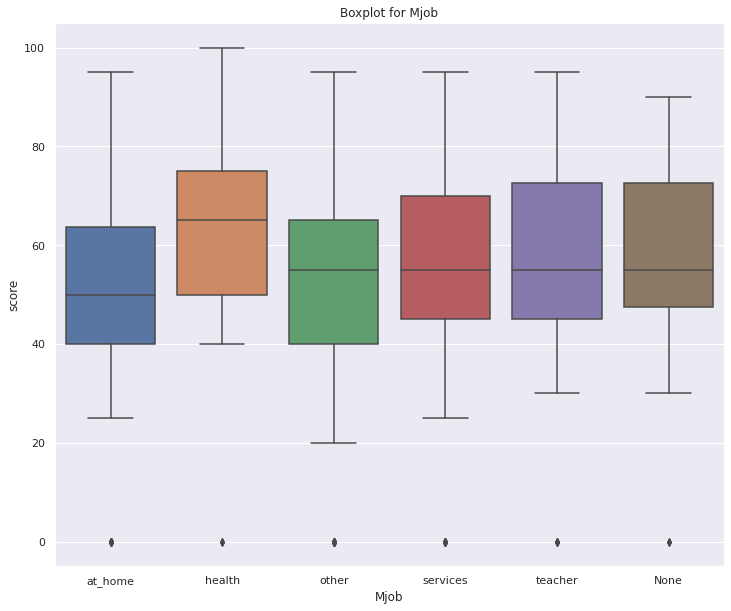


[X] Has NA values!   [ higher ]
yes     356
None     20
no       19
Name: higher, dtype: int64


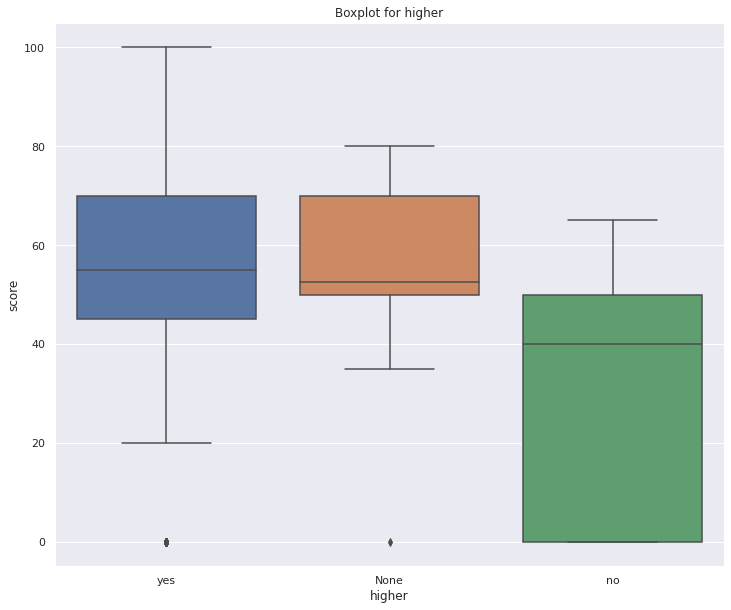


[X] Has NA values!   [ address ]
U       295
R        83
None     17
Name: address, dtype: int64


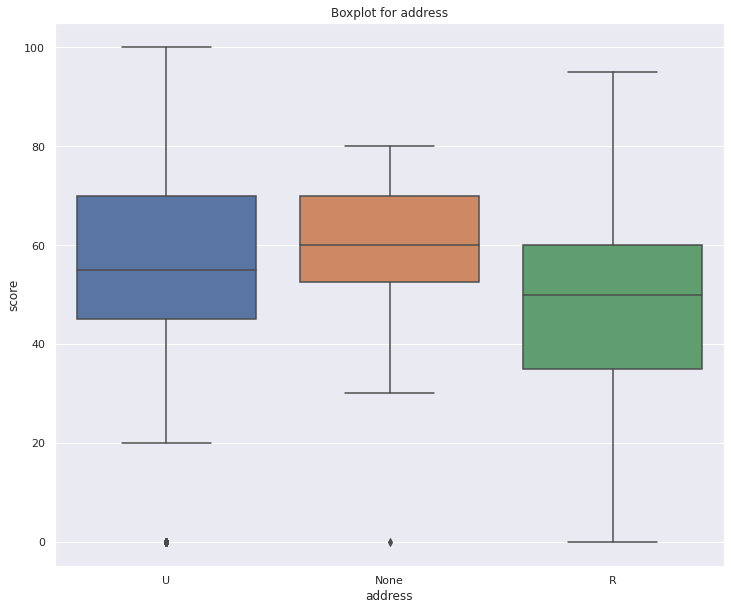


[X] Has NA values!   [ romantic ]
no      240
yes     124
None     31
Name: romantic, dtype: int64


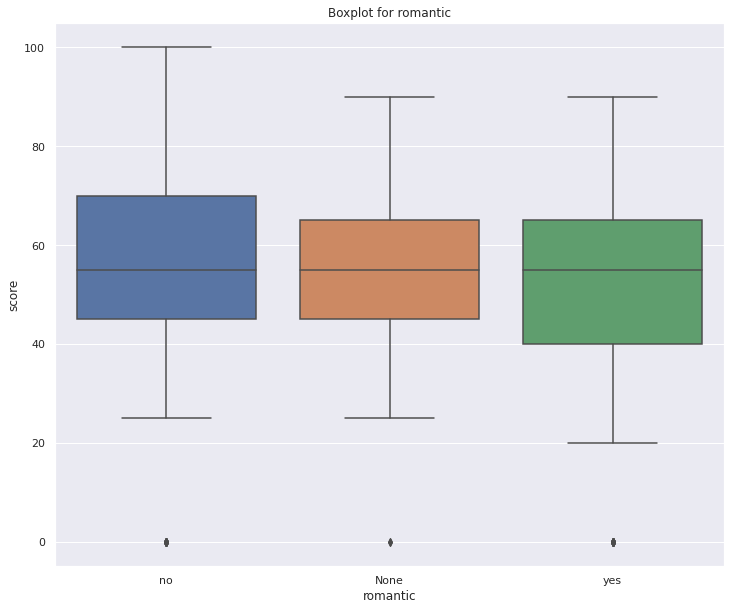

In [6]:
use_nominative_cols = ["Fjob"] + use_nominative_cols
get_boxplots(use_nominative_cols)

# Числовые переменные

## Сводная информация по числовым колонкам

In [7]:
print(
    "Numeric columns count:",
    len(students.select_dtypes(["int64", "float64"]).columns.tolist()),
)
numeric_columns_overview = students.describe().T
numeric_columns_overview

Numeric columns count: 13


,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,392.0,2.750000,1.098127,0.0,2.0,3.0,4.0,4.0
Fedu,371.0,2.614555,2.228732,0.0,2.0,2.0,3.0,40.0
traveltime,367.0,1.438692,0.694181,1.0,1.0,1.0,2.0,4.0
studytime,388.0,2.038660,0.842078,1.0,1.0,2.0,2.0,4.0
failures,373.0,0.337802,0.743135,0.0,0.0,0.0,0.0,3.0
"studytime, granular",388.0,-6.115979,2.526235,-12.0,-6.0,-6.0,-3.0,-3.0
famrel,368.0,3.937500,0.927277,-1.0,4.0,4.0,5.0,5.0
freetime,384.0,3.231771,0.993940,1.0,3.0,3.0,4.0,5.0
goout,387.0,3.105943,1.115896,1.0,2.0,3.0,4.0,5.0


### И количества пропущенных значений

In [8]:
for variable in numeric_columns_overview.index:
    print(
        "Количество пропущенных значений для",
        variable,
        "=",
        students.loc[students[variable].isna()].shape[0],
    )

Количество пропущенных значений для age = 0
Количество пропущенных значений для Medu = 3
Количество пропущенных значений для Fedu = 24
Количество пропущенных значений для traveltime = 28
Количество пропущенных значений для studytime = 7
Количество пропущенных значений для failures = 22
Количество пропущенных значений для studytime, granular = 7
Количество пропущенных значений для famrel = 27
Количество пропущенных значений для freetime = 11
Количество пропущенных значений для goout = 8
Количество пропущенных значений для health = 15
Количество пропущенных значений для absences = 12
Количество пропущенных значений для score = 6


Пропущенные есть везде, кроме возраста. Вспомним ка, сколько у нас всего строк то...

In [9]:
students.shape[0]

395

А если без пустых значений...

In [10]:
students.dropna().shape[0]

97

просто грохнуть все NA нельзя

# А теперь глянем на каждую




-= age =-


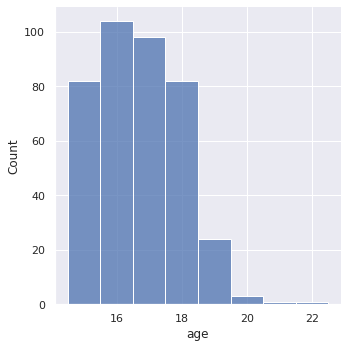

Уникальные значения:
[15, 16, 17, 18, 19, 20, 21, 22]
Частоты:
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
Пропущенных: 0



-= Medu =-


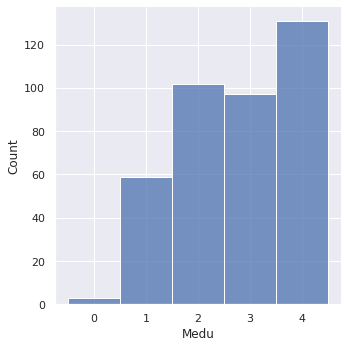

Уникальные значения:
[0.0, 1.0, 2.0, 3.0, 4.0, nan]
Частоты:
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64
Пропущенных: 3



-= Fedu =-


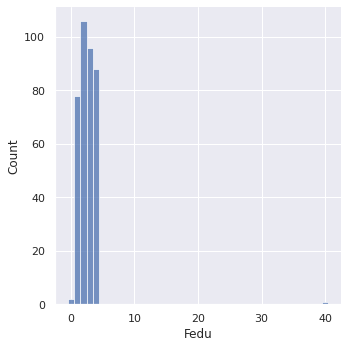

Уникальные значения:
[0.0, 1.0, 2.0, 3.0, 4.0, 40.0, nan]
Частоты:
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64
Пропущенных: 24



-= traveltime =-


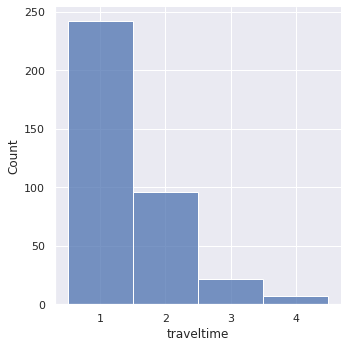

Уникальные значения:
[1.0, 2.0, 3.0, 4.0, nan]
Частоты:
1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64
Пропущенных: 28



-= studytime =-


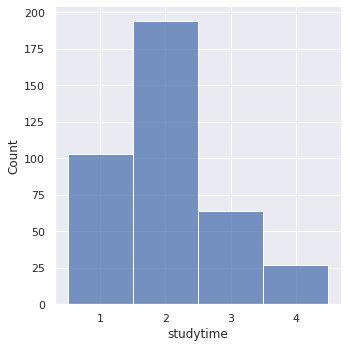

Уникальные значения:
[1.0, 2.0, 3.0, 4.0, nan]
Частоты:
2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64
Пропущенных: 7



-= failures =-


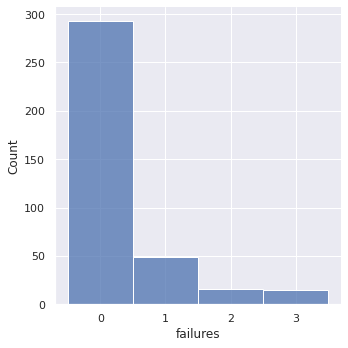

Уникальные значения:
[0.0, 1.0, 2.0, 3.0, nan]
Частоты:
0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64
Пропущенных: 22



-= studytime, granular =-


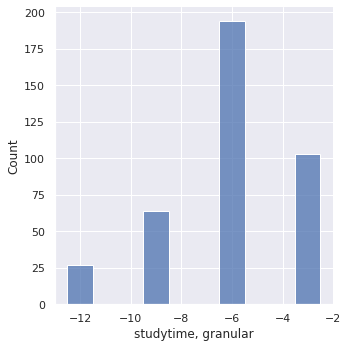

Уникальные значения:
[-12.0, -9.0, -6.0, -3.0, nan]
Частоты:
-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64
Пропущенных: 7



-= famrel =-


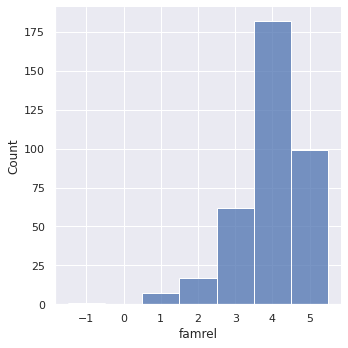

Уникальные значения:
[-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]
Частоты:
 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64
Пропущенных: 27



-= freetime =-


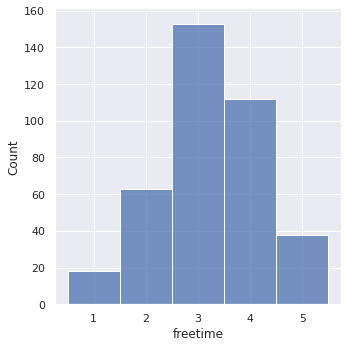

Уникальные значения:
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
Частоты:
3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64
Пропущенных: 11



-= goout =-


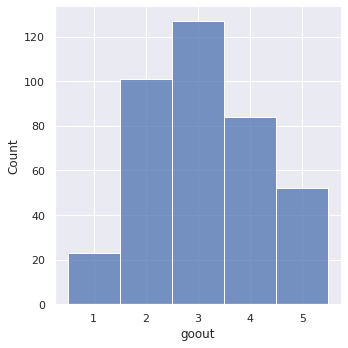

Уникальные значения:
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
Частоты:
3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64
Пропущенных: 8



-= health =-


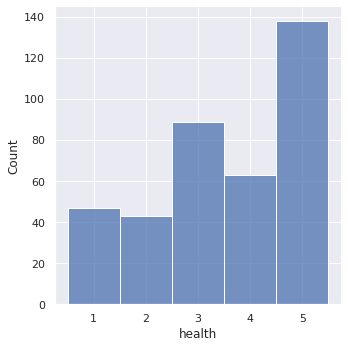

Уникальные значения:
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
Частоты:
5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64
Пропущенных: 15



-= absences =-


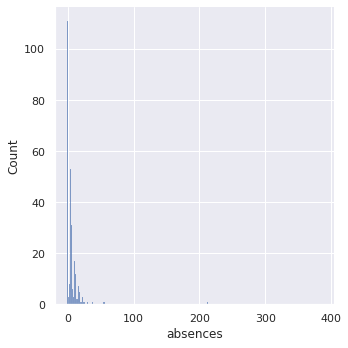

Уникальные значения:
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 28.0, 30.0, 38.0, 40.0, 54.0, 56.0, 75.0, 212.0, 385.0, nan]
Частоты:
0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64
Пропущенных: 12



-= score =-


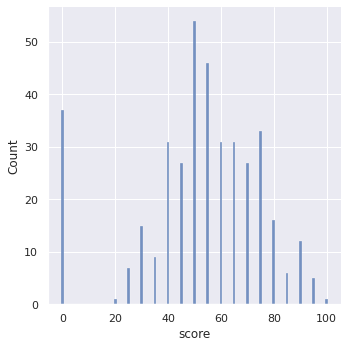

Уникальные значения:
[0.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, nan]
Частоты:
50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64
Пропущенных: 6


In [11]:
get_numeric_overview(numeric_columns_overview.index)

nan пока не трогаем (до корреляционного анализа), концентрируемся на выбросах

Кроме age все имеют выбросы и все значения по сути целочисленные. Многие и вовсе можно бы считать номинативными.

## Итого на настоящий момент:

- **age** - убрать тех, кто старше 19

- **Medu** - убрать нули, считать номинативной
- **Fedu** - убрать нули и 40 (выброс), считать номинативной
- **traveltime** - 4 встречается редко, но более 5 раз, оставим, считать номинативной
- **studytime** - выбросов нет, считать номинативной
- **failures** - выбросов нет, считать номинативной
- **studytime**, granular - ничего не убирать (пока), считать номинативной
- **famrel** - убрать минус единицу, посмотреть дополнительно как номинативную
- **freetime** - посмотреть дополнительно как номинативную
- **goout** - посмотреть дополнительно как номинативную
- **health** - посмотреть дополнительно как номинативную

- **absences** - посчитать выбросы по формуле
- **score** - наша целевая переменная, точно убить пустые значения + посчитать выбросы по формуле

In [12]:
# пусть пустые будут None
for i in numeric_columns_overview.index:
    students[i] = students[i].apply(lambda s: None if str(s) == "nan" else s)

In [13]:
students = students.query("age <= 19")
students = students.query("Medu > 0")
students = students.query("Fedu > 0 & Fedu < 40")
students = students.query("famrel != -1")

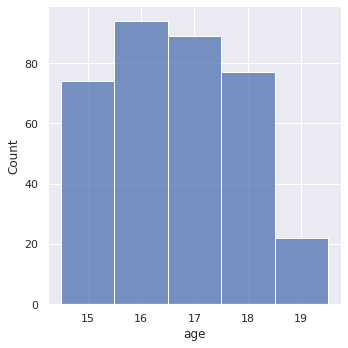

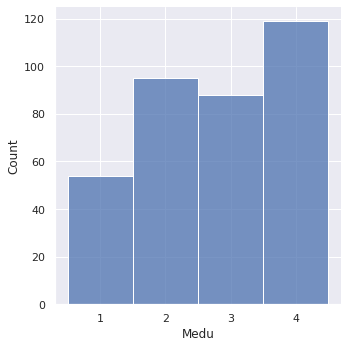

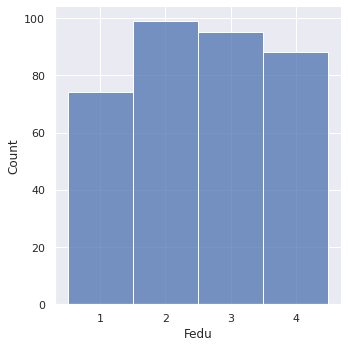

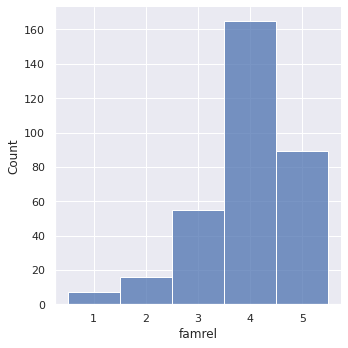

In [14]:
sns.displot(students.age, discrete=True)
plt.show()
sns.displot(students.Medu, discrete=True)
plt.show()
sns.displot(students.Fedu, discrete=True)
plt.show()
sns.displot(students.famrel, discrete=True)
plt.show()

In [15]:
print("age уникальные значения:", students.age.unique().tolist())
print("Medu уникальные значения:", students.Medu.unique().tolist())
print("Fedu уникальные значения:", students.Fedu.unique().tolist())
print("famrel уникальные значения:", students.famrel.unique().tolist())

age уникальные значения: [18, 17, 15, 16, 19]
Medu уникальные значения: [4.0, 1.0, 3.0, 2.0]
Fedu уникальные значения: [4.0, 1.0, 2.0, 3.0]
famrel уникальные значения: [4.0, 5.0, 3.0, nan, 2.0, 1.0]


После фильтрации **age, Medu и Fedu** остались без пустых значений. Хорошо

In [16]:
students.sample(9)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
225,GP,F,18,R,GT3,T,3.0,1.0,other,other,reputation,mother,1.0,2.0,1.0,no,no,no,yes,yes,-6.0,yes,yes,yes,5.0,3.0,3.0,4.0,16.0,35.0
358,MS,M,18,U,LE3,T,1.0,1.0,other,services,home,father,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,yes,3.0,3.0,2.0,3.0,4.0,50.0
160,GP,M,17,R,LE3,T,2.0,1.0,at_home,None,course,mother,NaN,1.0,2.0,no,no,no,None,yes,-3.0,no,yes,yes,NaN,3.0,2.0,5.0,0.0,0.0
368,MS,F,18,U,GT3,T,2.0,3.0,at_home,services,course,father,2.0,1.0,0.0,no,yes,yes,no,yes,-3.0,yes,yes,yes,5.0,2.0,3.0,4.0,0.0,50.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
18,GP,M,17,U,GT3,T,3.0,2.0,services,services,course,mother,1.0,1.0,3.0,no,yes,None,yes,yes,-3.0,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
264,GP,F,18,U,GT3,T,2.0,2.0,at_home,services,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,3.0,0.0,0.0
255,GP,M,17,U,LE3,T,1.0,1.0,health,other,course,mother,2.0,1.0,1.0,no,yes,no,yes,yes,-3.0,yes,yes,no,4.0,4.0,4.0,5.0,2.0,40.0
338,GP,F,18,U,LE3,T,3.0,3.0,services,services,home,mother,1.0,4.0,0.0,no,yes,no,no,yes,-12.0,yes,yes,no,5.0,NaN,3.0,1.0,7.0,85.0


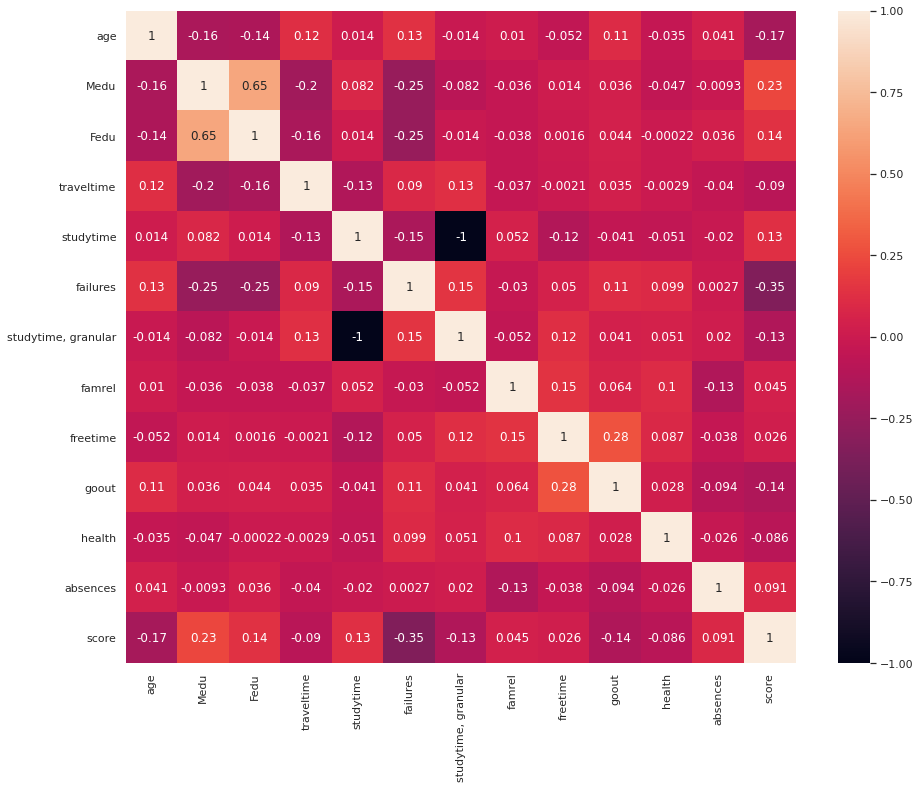

In [17]:
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(students[numeric_columns_overview.index].corr(), annot=True)
plt.show()

Так...

studytime и studytime, granular -- это одно и то-же

In [18]:
del students["studytime, granular"]

Fedu и Medu похожи, но недостаточно, чтобы я выкинул любую из них. В остальном... Все надо оставить.

## Проверим ряд числовых переменных, похожих на номинативные, по методу номинативных

In [19]:
nominative_like_vars = [
    "Medu",
    "Fedu",
    "traveltime",
    "studytime",
    "failures",
    "famrel",
    "freetime",
    "goout",
    "health",
]

In [20]:
use_additional_nominative_cols = []
for col in nominative_like_vars:
    use_nominative_cols += [get_stat_dif(col, 0.05)]
use_additional_nominative_cols = [c for c in use_nominative_cols if not c is None]

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки freetime



[V] Looks fine       [ Medu ]
4.0    119
2.0     95
3.0     88
1.0     54
Name: Medu, dtype: int64


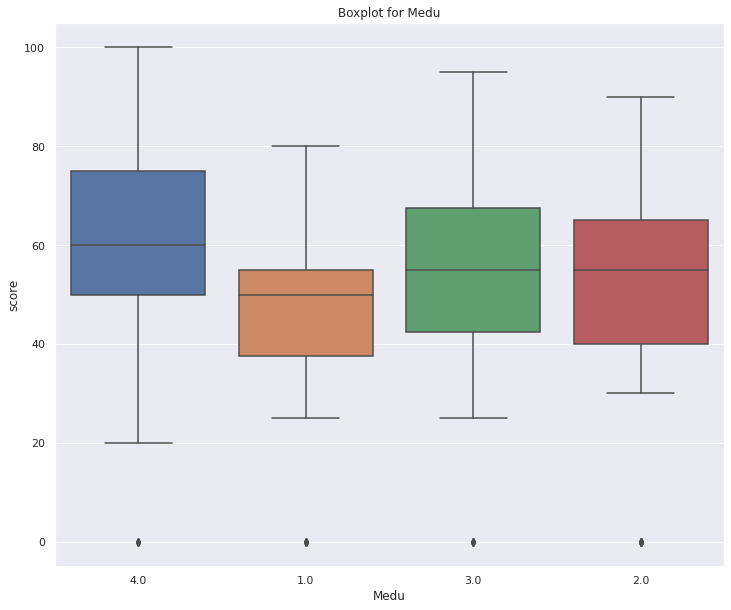


[V] Looks fine       [ Fedu ]
2.0    99
3.0    95
4.0    88
1.0    74
Name: Fedu, dtype: int64


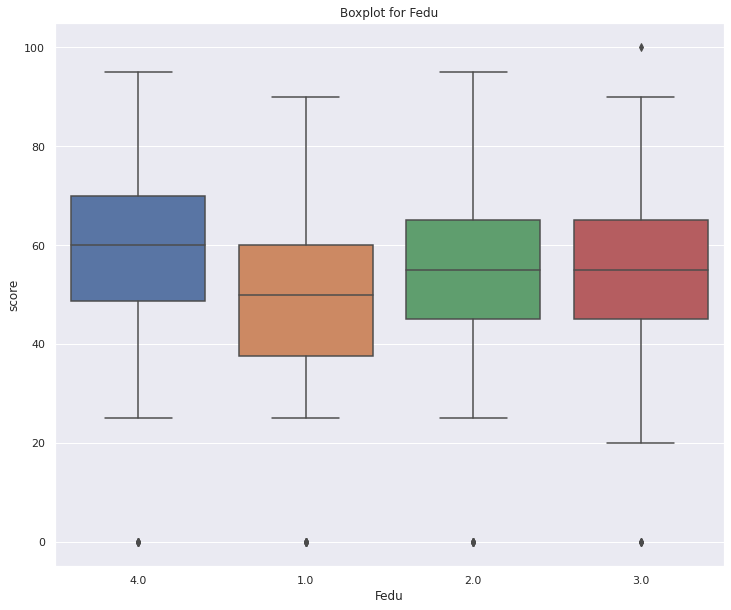


[X] Has NA values!   [ traveltime ]
1.0     215
2.0      88
None     25
3.0      21
4.0       7
Name: traveltime, dtype: int64


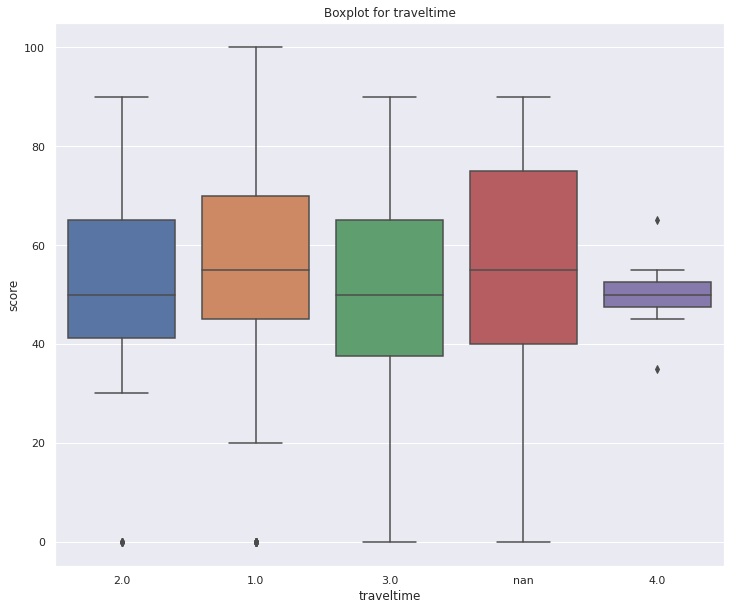


[X] Has NA values!   [ studytime ]
2.0     177
1.0      92
3.0      56
4.0      24
None      7
Name: studytime, dtype: int64


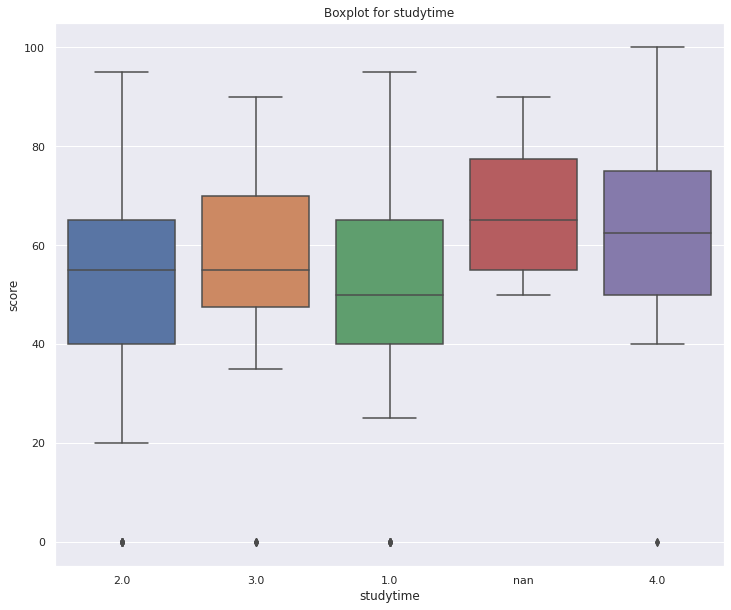


[X] Has NA values!   [ failures ]
0.0     271
1.0      44
None     18
3.0      12
2.0      11
Name: failures, dtype: int64


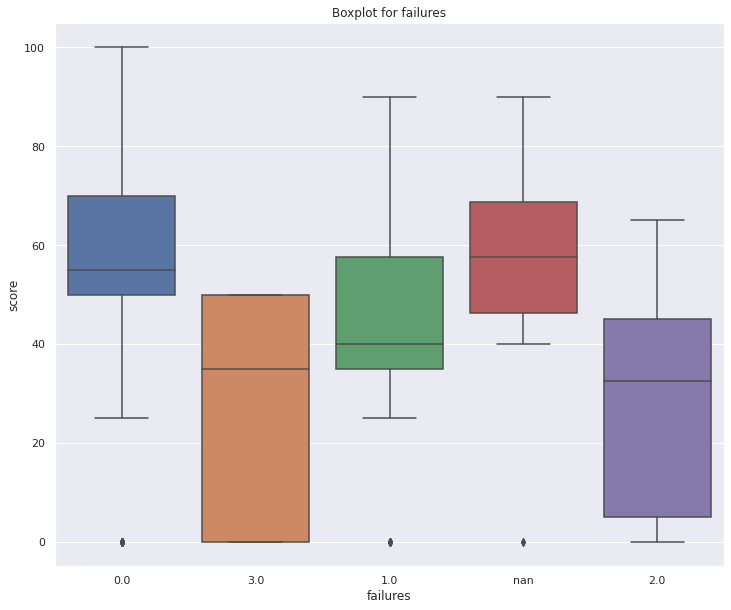


[X] Has NA values!   [ famrel ]
4.0     165
5.0      89
3.0      55
None     24
2.0      16
1.0       7
Name: famrel, dtype: int64


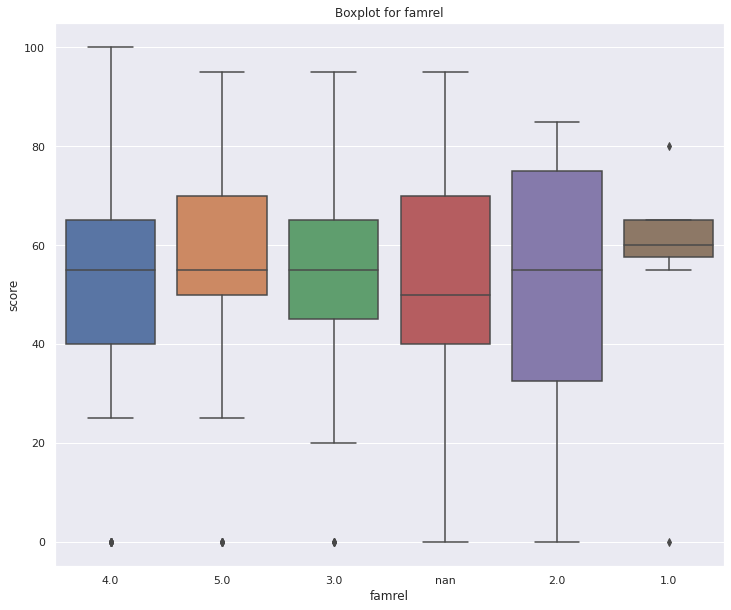


[X] Has NA values!   [ freetime ]
3.0     140
4.0     100
2.0      58
5.0      31
1.0      18
None      9
Name: freetime, dtype: int64


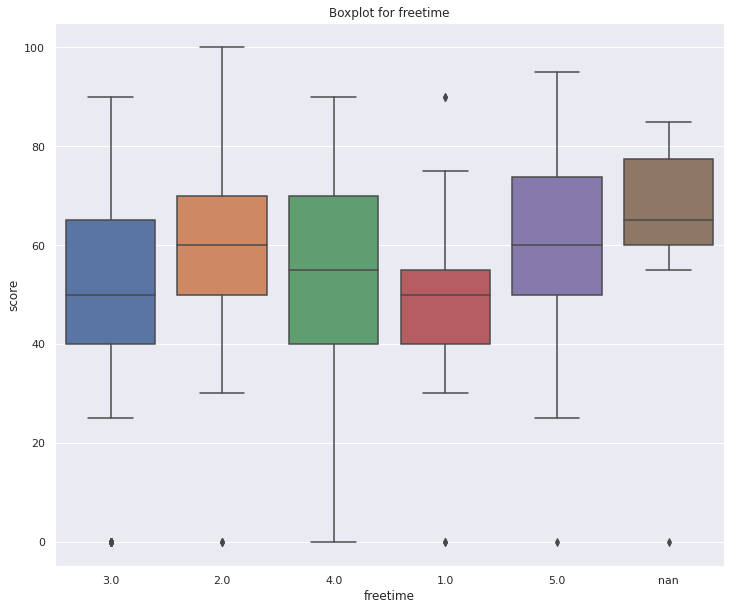


[X] Has NA values!   [ goout ]
3.0     117
2.0      87
4.0      76
5.0      47
1.0      22
None      7
Name: goout, dtype: int64


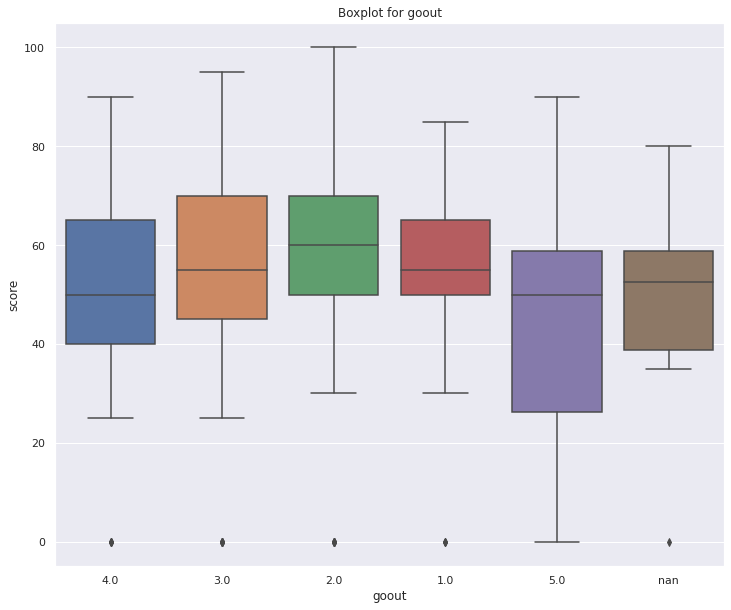


[X] Has NA values!   [ health ]
5.0     121
3.0      80
4.0      60
1.0      44
2.0      38
None     13
Name: health, dtype: int64


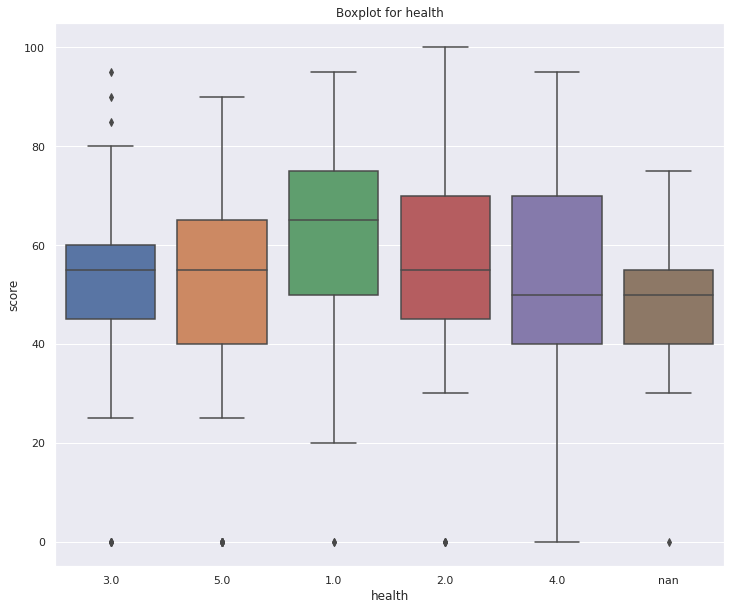

In [21]:
get_boxplots(nominative_like_vars)

Но вообще все выглядят разннобразно и значимо относительно целевой переменной

# Поработаем с "настоящими" числовыми переменными

Их у нас две:

- **score** (наша целевая переменная)
- **absences**

In [22]:
students = students.loc[~students.score.isna()]
students["score"] = students.score.astype("int16")
students.score.sort_values().unique().tolist()

[0, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

Очень аккуратно и потому искусственно выглядит. Но не суть )

In [23]:
students.shape

(350, 29)

<AxesSubplot:>

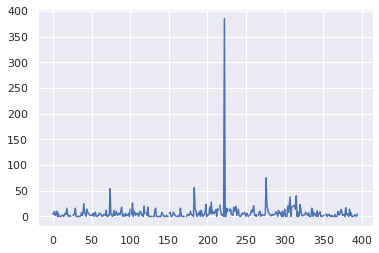

In [24]:
students.absences.plot()

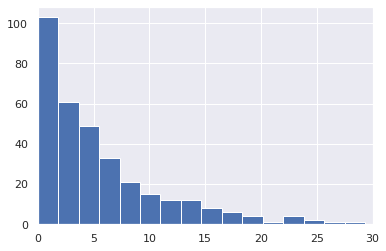

,absences
count,339.000000
mean,6.896755
std,22.204495
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,385.000000


In [25]:
ax = students.absences.hist(bins=210)
ax.set_xlim(0, 30)
plt.show()
pd.DataFrame(students.absences.describe())

### Выбросы навскидку:

In [26]:
students.query("absences < 30").shape[0], students.query("absences >= 30").shape[0]

(333, 6)

### Выбросы по межквартильному расстоянию:

In [27]:
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
print("Границы выбросов:", perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)

Границы выбросов: -12.0 20.0


### Впринципе до 20 выглядит разумнее, чем до 30:

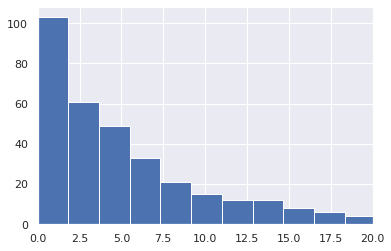

320 19


In [28]:
ax = students.absences.hist(bins=210)
ax.set_xlim(0, 20)
plt.show()
print(
    students.query("absences < 20").shape[0], students.query("absences >= 20").shape[0]
)

In [29]:
students = students.query("absences < 30")

Хотя 19 строк жалко. Отсеку по тридцатке, после, когда обработаю пропущенные значения, разберусь, сокращать до двадцатки или же те строки имеют полезные значения

# Теперь разберёмся с пропущенными значениями

In [30]:
for variable in students.columns:
    print(
        "Количество пропущенных значений для",
        variable,
        "=",
        students.loc[students[variable].isna()].shape[0],
    )

Количество пропущенных значений для school = 0
Количество пропущенных значений для sex = 0
Количество пропущенных значений для age = 0
Количество пропущенных значений для address = 11
Количество пропущенных значений для famsize = 21
Количество пропущенных значений для Pstatus = 36
Количество пропущенных значений для Medu = 0
Количество пропущенных значений для Fedu = 0
Количество пропущенных значений для Mjob = 18
Количество пропущенных значений для Fjob = 33
Количество пропущенных значений для reason = 16
Количество пропущенных значений для guardian = 27
Количество пропущенных значений для traveltime = 25
Количество пропущенных значений для studytime = 5
Количество пропущенных значений для failures = 18
Количество пропущенных значений для schoolsup = 8
Количество пропущенных значений для famsup = 31
Количество пропущенных значений для paid = 35
Количество пропущенных значений для activities = 14
Количество пропущенных значений для nursery = 14
Количество пропущенных значений для highe

Пропущенные есть везде, кроме возраста, школы, пола и образования родителей. Вспомним ка, сколько у нас всего строк то...

In [31]:
students.dtypes

school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu          float64
Fedu          float64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime    float64
studytime     float64
failures      float64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime      float64
goout         float64
health        float64
absences      float64
score           int16
dtype: object

In [32]:
students.shape[0]

333

А если без пустых значений...

In [33]:
students.dropna().shape[0]

93

просто грохнуть все NA всё ещё нельзя

## Начнём с наиболее значимых

In [34]:
most_important = set(
    [c for c in use_nominative_cols + use_additional_nominative_cols if c]
)
most_important

{'Fjob',
 'Medu',
 'Mjob',
 'address',
 'failures',
 'freetime',
 'higher',
 'romantic'}

In [35]:
for variable in most_important:
    print(
        "Количество пропущенных значений для",
        variable,
        "=",
        students.loc[students[variable].isna()].shape[0],
    )

Количество пропущенных значений для higher = 14
Количество пропущенных значений для Medu = 0
Количество пропущенных значений для freetime = 6
Количество пропущенных значений для Mjob = 18
Количество пропущенных значений для Fjob = 33
Количество пропущенных значений для romantic = 27
Количество пропущенных значений для failures = 18
Количество пропущенных значений для address = 11


### Количества пропущенных значений для каждой строки

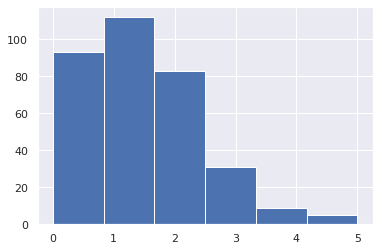

In [36]:
ax = plt.hist(students.isnull().sum(axis=1).sort_values(), bins=6)
plt.show()

### Отсечём те строки, где уж слишком много пропусков

In [37]:
students = students.loc[~(students.isnull().sum(axis=1) >= 4)]

In [38]:
for variable in most_important:
    print(
        "Количество пропущенных значений для",
        variable,
        "=",
        students.loc[students[variable].isna()].shape[0],
    )

Количество пропущенных значений для higher = 13
Количество пропущенных значений для Medu = 0
Количество пропущенных значений для freetime = 6
Количество пропущенных значений для Mjob = 15
Количество пропущенных значений для Fjob = 25
Количество пропущенных значений для romantic = 22
Количество пропущенных значений для failures = 15
Количество пропущенных значений для address = 9


In [39]:
students.address.value_counts()

U    241
R     69
Name: address, dtype: int64

## Попробуем заполнить пропуски значениями из похожих строк

Нашёл в документации к sklearn: https://scikit-learn.org/stable/modules/impute.html

In [40]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")

In [41]:
inputs = imputer.fit_transform(students.select_dtypes(["int", "float", "int16"]))
inputs = pd.DataFrame(
    inputs,
    columns=students.select_dtypes(["int", "float", "int16"]).columns,
    index=students.index,
)

In [42]:
students = students.select_dtypes("object").join(inputs)
students

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
0,GP,F,U,None,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,None,no,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,U,GT3,None,at_home,other,course,father,no,yes,no,no,no,yes,yes,no,17.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,None,no,yes,yes,yes,None,15.0,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,U,GT3,T,health,None,home,mother,no,yes,yes,yes,yes,yes,yes,yes,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,U,LE3,T,teacher,services,course,mother,no,yes,yes,no,yes,yes,yes,no,18.0,3.0,1.0,1.0,2.0,0.0,4.0,3.0,4.0,1.0,0.0,40.0
389,MS,F,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,None,no,18.0,1.0,1.0,1.5,2.0,1.0,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no,17.0,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,2.0,3.0,80.0
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,None,no,yes,yes,no,18.0,3.0,2.0,3.0,1.0,0.0,4.0,4.0,1.0,5.0,0.0,50.0


In [43]:
final_cols = sorted(list(set(inputs.columns.tolist() + list(most_important))))
for variable in final_cols:
    print(
        "Количество пропущенных значений для",
        variable,
        "=",
        students.loc[students[variable].isna()].shape[0],
    )

Количество пропущенных значений для Fedu = 0
Количество пропущенных значений для Fjob = 25
Количество пропущенных значений для Medu = 0
Количество пропущенных значений для Mjob = 15
Количество пропущенных значений для absences = 0
Количество пропущенных значений для address = 9
Количество пропущенных значений для age = 0
Количество пропущенных значений для failures = 0
Количество пропущенных значений для famrel = 0
Количество пропущенных значений для freetime = 0
Количество пропущенных значений для goout = 0
Количество пропущенных значений для health = 0
Количество пропущенных значений для higher = 13
Количество пропущенных значений для romantic = 22
Количество пропущенных значений для score = 0
Количество пропущенных значений для studytime = 0
Количество пропущенных значений для traveltime = 0


## Осталось проработать номинативные текстовые переменные

Варианта два -- руками исследовать каждый или же превратить их в цифры и тоже запилить KNNImputer-ом.

Пожалуй, второе

In [44]:
students = students[final_cols]

In [45]:
students.Fjob.unique()

array(['teacher', 'other', None, 'health', 'services', 'at_home'],
      dtype=object)

In [46]:
students_bak = deepcopy(students)

col_voc = {}
for col in students.select_dtypes("object").columns:
    col_voc[col] = dict(zip(students[col].unique(), range(len(students[col].unique()))))
    col_voc[col][None] = np.nan
    students[col] = students[col].map(col_voc[col])

<ipython-input-46-360b3b126ce4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students[col] = students[col].map(col_voc[col])


In [47]:
students.dtypes

Fedu          float64
Fjob          float64
Medu          float64
Mjob          float64
absences      float64
address       float64
age           float64
failures      float64
famrel        float64
freetime      float64
goout         float64
health        float64
higher        float64
romantic      float64
score         float64
studytime     float64
traveltime    float64
dtype: object

In [48]:
col_voc

{'Fjob': {'teacher': 0,
  'other': 1,
  None: nan,
  'health': 3,
  'services': 4,
  'at_home': 5},
 'Mjob': {'at_home': 0,
  'health': 1,
  'other': 2,
  'services': 3,
  'teacher': 4,
  None: nan},
 'address': {'U': 0, None: nan, 'R': 2},
 'higher': {'yes': 0, None: nan, 'no': 2},
 'romantic': {'no': 0, None: nan, 'yes': 2}}

In [49]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")

In [50]:
students_fillna = imputer.fit_transform(students)
students_fillna = pd.DataFrame(inputs, columns=students.columns, index=students.index)

In [51]:
students_fillna

,Fedu,Fjob,Medu,Mjob,absences,address,age,failures,famrel,freetime,goout,health,higher,romantic,score,studytime,traveltime
0,4.0,NaN,4.0,NaN,6.0,NaN,18.0,0.0,4.0,3.0,4.0,3.0,NaN,NaN,30.0,2.0,2.0
1,1.0,NaN,1.0,NaN,4.0,NaN,17.0,0.0,5.0,3.0,3.0,3.0,NaN,NaN,30.0,2.0,1.0
2,1.0,NaN,1.0,NaN,10.0,NaN,15.0,3.0,4.0,3.0,2.0,3.0,NaN,NaN,50.0,2.0,1.0
3,2.0,NaN,4.0,NaN,2.0,NaN,15.0,0.0,3.0,2.0,2.0,5.0,NaN,NaN,75.0,3.0,1.0
4,3.0,NaN,3.0,NaN,4.0,NaN,16.0,0.0,4.0,3.0,2.0,5.0,NaN,NaN,50.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,1.0,NaN,3.0,NaN,0.0,NaN,18.0,0.0,4.0,3.0,4.0,1.0,NaN,NaN,40.0,2.0,1.0
389,1.0,NaN,1.0,NaN,0.0,NaN,18.0,1.0,1.0,1.0,1.0,5.0,NaN,NaN,0.0,2.0,1.5
391,1.0,NaN,3.0,NaN,3.0,NaN,17.0,0.0,2.0,4.0,5.0,2.0,NaN,NaN,80.0,1.0,2.0
393,2.0,NaN,3.0,NaN,0.0,NaN,18.0,0.0,4.0,4.0,1.0,5.0,NaN,NaN,50.0,1.0,3.0


# Выходит какая-то ерунда.

Странно, значения вроде числовые, сделал то же самое, а получил колонки пустых значений.
Поиски тоже не принесли результата... Надо будет на досуге дорыть.

## Возвращаюсь к копии из бэкапа. Не прокатило

In [52]:
students_bak

,Fedu,Fjob,Medu,Mjob,absences,address,age,failures,famrel,freetime,goout,health,higher,romantic,score,studytime,traveltime
0,4.0,teacher,4.0,at_home,6.0,U,18.0,0.0,4.0,3.0,4.0,3.0,yes,no,30.0,2.0,2.0
1,1.0,other,1.0,at_home,4.0,U,17.0,0.0,5.0,3.0,3.0,3.0,yes,no,30.0,2.0,1.0
2,1.0,other,1.0,at_home,10.0,U,15.0,3.0,4.0,3.0,2.0,3.0,yes,None,50.0,2.0,1.0
3,2.0,None,4.0,health,2.0,U,15.0,0.0,3.0,2.0,2.0,5.0,yes,yes,75.0,3.0,1.0
4,3.0,other,3.0,other,4.0,U,16.0,0.0,4.0,3.0,2.0,5.0,yes,no,50.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,1.0,services,3.0,teacher,0.0,U,18.0,0.0,4.0,3.0,4.0,1.0,yes,no,40.0,2.0,1.0
389,1.0,other,1.0,other,0.0,U,18.0,1.0,1.0,1.0,1.0,5.0,yes,no,0.0,2.0,1.5
391,1.0,services,3.0,services,3.0,U,17.0,0.0,2.0,4.0,5.0,2.0,yes,no,80.0,1.0,2.0
393,2.0,other,3.0,services,0.0,R,18.0,0.0,4.0,4.0,1.0,5.0,yes,no,50.0,1.0,3.0


In [53]:
for variable in students_bak.select_dtypes("object").columns:
    print(
        "Количество пропущенных значений для",
        variable,
        "=",
        students.loc[students[variable].isna()].shape[0],
    )

Количество пропущенных значений для Fjob = 25
Количество пропущенных значений для Mjob = 15
Количество пропущенных значений для address = 9
Количество пропущенных значений для higher = 13
Количество пропущенных значений для romantic = 22


In [54]:
students_bak.shape, students_bak.dropna().shape

((319, 17), (239, 17))

### Ладно, за неимением лучшей идеи и израсходованием выделенных 8 часов, дропну таки оставшееся...

In [55]:
students_bak.dropna(inplace=True)
students_bak

,Fedu,Fjob,Medu,Mjob,absences,address,age,failures,famrel,freetime,goout,health,higher,romantic,score,studytime,traveltime
0,4.0,teacher,4.0,at_home,6.0,U,18.0,0.0,4.0,3.0,4.0,3.0,yes,no,30.0,2.0,2.0
1,1.0,other,1.0,at_home,4.0,U,17.0,0.0,5.0,3.0,3.0,3.0,yes,no,30.0,2.0,1.0
4,3.0,other,3.0,other,4.0,U,16.0,0.0,4.0,3.0,2.0,5.0,yes,no,50.0,2.0,1.0
5,3.0,other,4.0,services,10.0,U,16.0,0.0,5.0,4.0,2.0,5.0,yes,no,75.0,2.0,1.0
7,4.0,teacher,4.0,other,6.0,U,17.0,0.0,4.0,1.0,4.0,1.0,yes,no,30.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,1.0,services,3.0,teacher,0.0,U,18.0,0.0,4.0,3.0,4.0,1.0,yes,no,40.0,2.0,1.0
389,1.0,other,1.0,other,0.0,U,18.0,1.0,1.0,1.0,1.0,5.0,yes,no,0.0,2.0,1.5
391,1.0,services,3.0,services,3.0,U,17.0,0.0,2.0,4.0,5.0,2.0,yes,no,80.0,1.0,2.0
393,2.0,other,3.0,services,0.0,R,18.0,0.0,4.0,4.0,1.0,5.0,yes,no,50.0,1.0,3.0


# Итоговые выводы

Наибольшее значение на успеваемость оказывают следубщие переменные:

In [56]:
set(final_cols) - {"score"}

{'Fedu',
 'Fjob',
 'Medu',
 'Mjob',
 'absences',
 'address',
 'age',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'health',
 'higher',
 'romantic',
 'studytime',
 'traveltime'}

Пустые значения в целевой переменной **score** были убраны, переменные, не показавшие значимости или повторяющие другие переменные, были убраны. В числовых переменных пропуски заполнены методом ближайших соседей.

Была произведена попытка перекодировать номинативные переменные в числовые и повторить фокус, но фокус не удался.

### Что стоит попробовать на будущее (и что можно было бы применить здесь)

- добить ошибку с KNNImputer и научиться использовать данный метод с номинативными переменными
- вместо того чтобы отбрасывать малозначимые колонки номинативных переменных, можно было бы сгруппировать похожие по распределению варианты в один
- надо просто набить руку на большем числе задач